# Lab-2-Introduce Phi-3 Vision

In [1]:
import requests
from pathlib import Path

In [ ]:
from ov_phi3_vision import convert_phi3_model

In [ ]:
from pathlib import Path
import nncf


model_id = "microsoft/Phi-3-vision-128k-instruct"
out_dir = Path("../model/phi-3-vision-128k-instruct-ov")
compression_configuration = {
    "mode": nncf.CompressWeightsMode.INT4_SYM,
    "group_size": 64,
    "ratio": 0.6,
}
convert_phi3_model(model_id, out_dir, compression_configuration)

In [2]:
from utils.notebook_utils import device_widget

device = device_widget(default="GPU", exclude=["NPU"])

device

Dropdown(description='Device:', index=1, options=('CPU', 'GPU', 'AUTO'), value='GPU')

In [3]:
from utils.ov_phi3_vision import OvPhi3Vision

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


In [5]:
model = OvPhi3Vision(out_dir, device.value)

configuration_phi3_v.py:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

C:\Users\kinfeylo\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kinfeylo\.cache\huggingface\hub\models--microsoft--Phi-3-vision-128k-instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
A new version of the following files was downloaded from https://huggingface.c

In [6]:
import requests
from PIL import Image

In [7]:
image = Image.open(r"../examples/imgs/player.png")

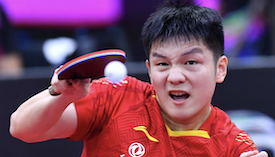

In [8]:
image

In [9]:
from transformers import AutoProcessor, TextStreamer

messages = [
    {"role": "user", "content": "<|image_1|>\n Can you help me to analyze this image?"},
]

processor = AutoProcessor.from_pretrained(out_dir, trust_remote_code=True)

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = processor(prompt, [image], return_tensors="pt")

generation_args = {"max_new_tokens": 512, "do_sample": False, "streamer": TextStreamer(processor.tokenizer, skip_prompt=True, skip_special_tokens=True)}

print("Ana:")
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Coding:
The image captures a dynamic moment in a table tennis match. A player, dressed in a vibrant red shirt, is in the midst of a powerful swing. The player's right hand is extended, gripping a blue and red paddle, poised to strike the white ball that hovers in the air. The background, though blurred, hints at a competitive setting, possibly a sports arena. The player's intense focus and the imminent action suggest a high-stakes game. The image does not provide any information that could be used to identify the specific landmark referred to as 'sa_179'. The image focuses solely on the table tennis match in progress.
